In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read in all the words
words = open('makemore/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [133]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
# num_words_to_train_on = 5
num_words_to_train_on = len(words)
X, Y = [], []
for w in words[:num_words_to_train_on]:

    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [134]:
X, X.shape, X.dtype

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         ...,
         [26, 26, 25],
         [26, 25, 26],
         [25, 26, 24]]),
 torch.Size([228146, 3]),
 torch.int64)

In [21]:
Y, Y.shape, Y.dtype

(tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]),
 torch.Size([32]),
 torch.int64)

In [22]:
C = torch.randn((27, 2))

In [36]:
F.one_hot(torch.tensor(5), num_classes=27).float()

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-1.2760, -0.7069])

In [38]:
C[5]

tensor([-1.2760, -0.7069])

In [40]:
C
# the one-hot vector with element n set to 1 multiplied by the matrix C pulls out the nth row of C
# so it's equivalent to indexing directly into the matrix i.e. C[n]

tensor([[ 1.9611e+00, -1.0995e+00],
        [ 2.7967e-01,  4.5368e-01],
        [-3.5362e-01,  1.1076e+00],
        [-2.2520e-03, -2.2764e-01],
        [-1.9669e-01, -9.8899e-01],
        [-1.2760e+00, -7.0686e-01],
        [ 4.2441e-02, -1.4156e-01],
        [ 1.0835e+00, -1.4262e+00],
        [-2.6500e-01, -5.6620e-01],
        [ 4.5375e-01,  7.9916e-01],
        [-8.9608e-01,  7.0776e-01],
        [ 1.1521e+00,  1.9807e+00],
        [ 7.4913e-01,  1.3312e+00],
        [-1.7405e+00,  9.3072e-02],
        [ 1.2648e+00, -6.8516e-01],
        [ 1.5088e-01,  7.2055e-01],
        [-2.7819e-01,  4.3826e-01],
        [ 3.9997e-01, -5.2894e-01],
        [-3.8118e-01,  2.1561e+00],
        [-2.9894e-01, -2.0249e+00],
        [ 1.2458e+00,  4.4103e-01],
        [-5.7928e-01, -9.9984e-01],
        [-1.0429e+00,  4.5969e-01],
        [-8.9585e-01, -3.8178e-01],
        [ 2.4165e+00, -5.7713e-01],
        [-1.8270e-01,  1.3015e+00],
        [-5.7877e-01, -1.3279e+00]])

In [45]:
C[[5, 6, 7]] # can index tensors with a list, which pulls out 5th, 6th, and 7th rows

tensor([[-1.2760, -0.7069],
        [ 0.0424, -0.1416],
        [ 1.0835, -1.4262]])

In [49]:
C[X] # equivalent to calling C[row] for each row in X
# in the 3D tensor, each context vector of size N maps to an element 2D tensor consisting of 3 rows of 2 columns,
# with each 2D tensor mapping each character of context (i.e. each row of the 2D tensor) to its 2D embedding
# i.e. C[[0, 5, 13]] (element 2 of X) pulls out rows 0, 5, and 13 which are the embeddings for chars 0, 5, and 13. this is repeated
# for each row in X.

tensor([[[ 1.9611, -1.0995],
         [ 1.9611, -1.0995],
         [ 1.9611, -1.0995]],

        [[ 1.9611, -1.0995],
         [ 1.9611, -1.0995],
         [-1.2760, -0.7069]],

        [[ 1.9611, -1.0995],
         [-1.2760, -0.7069],
         [-1.7405,  0.0931]],

        [[-1.2760, -0.7069],
         [-1.7405,  0.0931],
         [-1.7405,  0.0931]],

        [[-1.7405,  0.0931],
         [-1.7405,  0.0931],
         [ 0.2797,  0.4537]],

        [[ 1.9611, -1.0995],
         [ 1.9611, -1.0995],
         [ 1.9611, -1.0995]],

        [[ 1.9611, -1.0995],
         [ 1.9611, -1.0995],
         [ 0.1509,  0.7205]],

        [[ 1.9611, -1.0995],
         [ 0.1509,  0.7205],
         [ 0.7491,  1.3312]],

        [[ 0.1509,  0.7205],
         [ 0.7491,  1.3312],
         [ 0.4537,  0.7992]],

        [[ 0.7491,  1.3312],
         [ 0.4537,  0.7992],
         [-1.0429,  0.4597]],

        [[ 0.4537,  0.7992],
         [-1.0429,  0.4597],
         [ 0.4537,  0.7992]],

        [[-1.0429,  0

In [43]:
C[X].shape

torch.Size([32, 3, 2])

In [50]:
X[13, 2]

tensor(1)

In [51]:
C[X][13, 2]

tensor([0.2797, 0.4537])

In [52]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [89]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [90]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [57]:
emb[:, 0, :] # gets 0th element aka the 1st row of each 2D tensor, for each 2D tensor in the list of 2D tensors

tensor([[ 1.9611, -1.0995],
        [ 1.9611, -1.0995],
        [ 1.9611, -1.0995],
        [-1.2760, -0.7069],
        [-1.7405,  0.0931],
        [ 1.9611, -1.0995],
        [ 1.9611, -1.0995],
        [ 1.9611, -1.0995],
        [ 0.1509,  0.7205],
        [ 0.7491,  1.3312],
        [ 0.4537,  0.7992],
        [-1.0429,  0.4597],
        [ 1.9611, -1.0995],
        [ 1.9611, -1.0995],
        [ 1.9611, -1.0995],
        [ 0.2797,  0.4537],
        [ 1.9611, -1.0995],
        [ 1.9611, -1.0995],
        [ 1.9611, -1.0995],
        [ 0.4537,  0.7992],
        [-0.2989, -2.0249],
        [ 0.2797,  0.4537],
        [-0.3536,  1.1076],
        [-1.2760, -0.7069],
        [ 0.7491,  1.3312],
        [ 1.9611, -1.0995],
        [ 1.9611, -1.0995],
        [ 1.9611, -1.0995],
        [-0.2989, -2.0249],
        [ 0.1509,  0.7205],
        [-0.2782,  0.4383],
        [-0.2650, -0.5662]])

In [61]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1) # combines each row of the 2D tensor to form 1 row for each 2D tensor in the list

tensor([[ 1.9611, -1.0995,  1.9611, -1.0995,  1.9611, -1.0995],
        [ 1.9611, -1.0995,  1.9611, -1.0995, -1.2760, -0.7069],
        [ 1.9611, -1.0995, -1.2760, -0.7069, -1.7405,  0.0931],
        [-1.2760, -0.7069, -1.7405,  0.0931, -1.7405,  0.0931],
        [-1.7405,  0.0931, -1.7405,  0.0931,  0.2797,  0.4537],
        [ 1.9611, -1.0995,  1.9611, -1.0995,  1.9611, -1.0995],
        [ 1.9611, -1.0995,  1.9611, -1.0995,  0.1509,  0.7205],
        [ 1.9611, -1.0995,  0.1509,  0.7205,  0.7491,  1.3312],
        [ 0.1509,  0.7205,  0.7491,  1.3312,  0.4537,  0.7992],
        [ 0.7491,  1.3312,  0.4537,  0.7992, -1.0429,  0.4597],
        [ 0.4537,  0.7992, -1.0429,  0.4597,  0.4537,  0.7992],
        [-1.0429,  0.4597,  0.4537,  0.7992,  0.2797,  0.4537],
        [ 1.9611, -1.0995,  1.9611, -1.0995,  1.9611, -1.0995],
        [ 1.9611, -1.0995,  1.9611, -1.0995,  0.2797,  0.4537],
        [ 1.9611, -1.0995,  0.2797,  0.4537, -1.0429,  0.4597],
        [ 0.2797,  0.4537, -1.0429,  0.4

In [64]:
len(torch.unbind(emb, 1)) # returns [emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]] without needing to explicitly define it

3

In [65]:
torch.cat(torch.unbind(emb, 1), dim=1).shape

torch.Size([32, 6])

In [66]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [67]:
a.shape

torch.Size([18])

In [71]:
a.view(3, 3, 2) # highly efficient since not changing underlying memory structure

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [72]:
a.storage()

/var/folders/8_/kl72rt_d67z2yxqnyg9_n3mw0000gn/T/ipykernel_21998/214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [81]:
emb.view(32, 6) # equivalent to the cat operation above

tensor([[ 1.9611, -1.0995,  1.9611, -1.0995,  1.9611, -1.0995],
        [ 1.9611, -1.0995,  1.9611, -1.0995, -1.2760, -0.7069],
        [ 1.9611, -1.0995, -1.2760, -0.7069, -1.7405,  0.0931],
        [-1.2760, -0.7069, -1.7405,  0.0931, -1.7405,  0.0931],
        [-1.7405,  0.0931, -1.7405,  0.0931,  0.2797,  0.4537],
        [ 1.9611, -1.0995,  1.9611, -1.0995,  1.9611, -1.0995],
        [ 1.9611, -1.0995,  1.9611, -1.0995,  0.1509,  0.7205],
        [ 1.9611, -1.0995,  0.1509,  0.7205,  0.7491,  1.3312],
        [ 0.1509,  0.7205,  0.7491,  1.3312,  0.4537,  0.7992],
        [ 0.7491,  1.3312,  0.4537,  0.7992, -1.0429,  0.4597],
        [ 0.4537,  0.7992, -1.0429,  0.4597,  0.4537,  0.7992],
        [-1.0429,  0.4597,  0.4537,  0.7992,  0.2797,  0.4537],
        [ 1.9611, -1.0995,  1.9611, -1.0995,  1.9611, -1.0995],
        [ 1.9611, -1.0995,  1.9611, -1.0995,  0.2797,  0.4537],
        [ 1.9611, -1.0995,  0.2797,  0.4537, -1.0429,  0.4597],
        [ 0.2797,  0.4537, -1.0429,  0.4

In [91]:
# h = emb.view(32, 6) @ W1 + b1
# h = emb.view(emb.shape[0], 6) @ W1 + b1
h = emb.view(-1, 6) @ W1 + b1 # these are all equivalent

In [92]:
h

tensor([[-0.8829,  1.8169, -4.1948,  ...,  5.9913,  0.0178, -2.3984],
        [-8.3727,  0.0181, -0.1050,  ...,  0.7233, -1.5377, -3.3940],
        [-3.8959,  0.2063,  2.1168,  ..., -2.4446,  4.6737, -0.4232],
        ...,
        [ 0.1045, -0.2324,  0.4988,  ...,  1.0673, -0.8765, -1.4761],
        [ 0.0973,  1.8939,  1.0253,  ...,  1.5906,  1.4566,  0.1921],
        [-1.5278,  0.4760,  1.3027,  ..., -0.3246, -0.2434, -1.3538]])

In [78]:
h.shape

torch.Size([32, 100])

In [93]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [94]:
h

tensor([[-0.7079,  0.9485, -0.9995,  ...,  1.0000,  0.0178, -0.9836],
        [-1.0000,  0.0181, -0.1046,  ...,  0.6190, -0.9117, -0.9977],
        [-0.9992,  0.2035,  0.9714,  ..., -0.9851,  0.9998, -0.3997],
        ...,
        [ 0.1042, -0.2283,  0.4612,  ...,  0.7884, -0.7046, -0.9007],
        [ 0.0970,  0.9557,  0.7720,  ...,  0.9202,  0.8970,  0.1898],
        [-0.9101,  0.4430,  0.8624,  ..., -0.3137, -0.2387, -0.8750]])

In [84]:
(emb.view(-1, 6) @ W1).shape

torch.Size([32, 100])

In [85]:
b1.shape

torch.Size([100])

In [86]:
# 32, 100
#  1, 100 -> leads to bias vector being added to each row of W1 (which is what we want)

In [95]:
# output layer
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [96]:
logits = h @ W2 + b2

In [98]:
counts = logits.exp()

In [99]:
prob = counts / counts.sum(1, keepdims=True)

In [101]:
prob.shape

torch.Size([32, 27])

In [102]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [103]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [104]:
prob[torch.arange(32), Y] # gets i, jth probability where i is a row of prob and j is a row in prob coming from Y
# e.g. we will get a zip of torch.arange(32) and Y, and get the element in prob corresponding to each zipped element

tensor([2.2659e-12, 4.7597e-05, 2.5637e-08, 2.0485e-02, 9.3551e-13, 2.5677e-06,
        3.4227e-05, 5.0204e-12, 3.2950e-08, 8.3984e-15, 1.0887e-09, 6.8532e-11,
        9.9701e-13, 1.7114e-08, 2.4729e-12, 7.5168e-10, 2.5174e-10, 1.1020e-04,
        1.5718e-12, 9.1184e-01, 7.2797e-08, 1.0436e-01, 1.3653e-01, 1.2207e-14,
        7.7116e-11, 1.0587e-05, 3.2476e-04, 7.6964e-10, 6.0792e-10, 1.9777e-11,
        1.2145e-10, 3.0688e-10])

In [105]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(18.3597)

In [106]:
# clean it up

In [135]:
X.shape, Y.shape # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [209]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [210]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [211]:
for p in parameters:
    p.requires_grad = True

In [212]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [222]:
steps = 10000
lri = []
lossi = []

for i in range(steps):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y[ix]) # equivalent to above, but more efficient
    # print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    # lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lre[i])
    # lossi.append(loss.item())
loss.item()

2.688178539276123

In [188]:
# training takes a long time, so let's do forward-backward-update on batches of the training data

torch.randint(0, X.shape[0], (32,))

tensor([  1459, 203080, 187951,  68627, 176446, 170849, 118462, 213029,  83251,
         86758, 214014,  67023, 203299,  88437, 105959, 142718, 123193, 159290,
         40203, 187818,  79655, 203764,  33520, 112202,  85382, 136977, 223176,
        128350, 200115, 193421,  77769,  11108])

In [223]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.2212, grad_fn=<NllLossBackward0>)

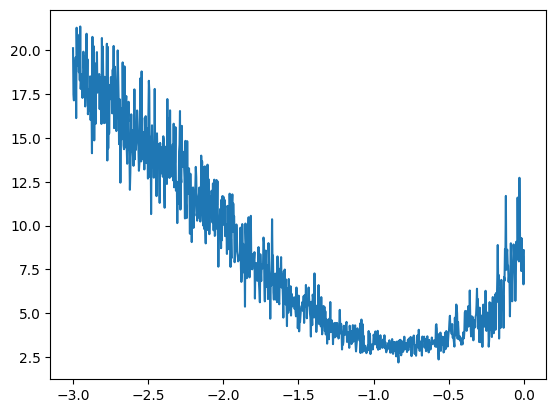

In [202]:
plt.plot(lri, lossi)

In [203]:
_, idx = torch.min(torch.tensor(lossi), dim=0)
idx
lri[idx]

tensor(-0.8348)

In [224]:
# training split (param training), dev/validation split (hyperparam training), test split
# 80%, 10%, 10%

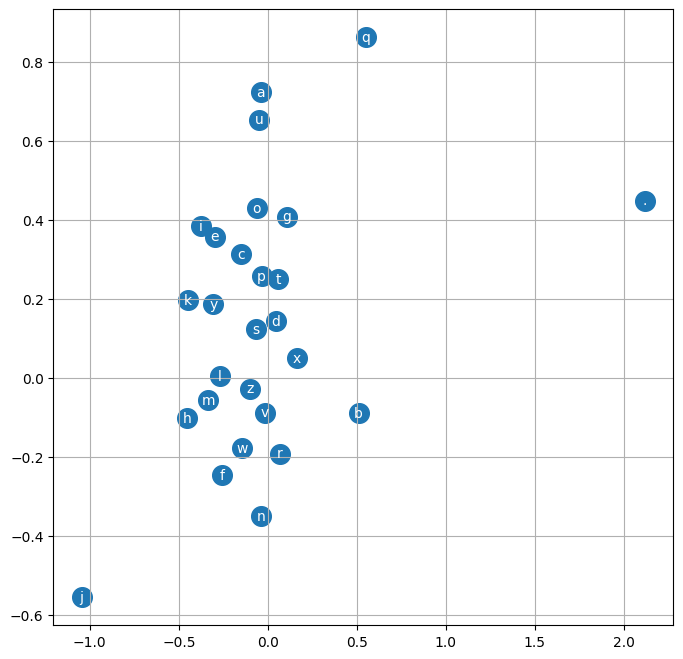

In [320]:
# only makes sense when embedding_dims = 2
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [342]:
# build the dataset

block_size = 6 # context length: how many characters do we take to predict the next one?

def build_dataset(words, block_size):
    X, Y = [], []
    for w in words:
    
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix] # crop and append
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1], block_size)
Xdev, Ydev = build_dataset(words[n1:n2], block_size)
Xte, Yte = build_dataset(words[n2:], block_size)


torch.Size([182441, 6]) torch.Size([182441])
torch.Size([22902, 6]) torch.Size([22902])
torch.Size([22803, 6]) torch.Size([22803])


In [343]:
# test set size, train set size, validation set size
len(words) - n2, n1, n2 - n1

(3204, 25626, 3203)

In [344]:
Xtr.shape, Ytr.shape

(torch.Size([182441, 6]), torch.Size([182441]))

In [345]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [346]:
embedding_dims = 10
l1_num_inputs = embedding_dims * block_size
l2_num_neurons = 200

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, embedding_dims), generator=g)
W1 = torch.randn((l1_num_inputs, l2_num_neurons), generator=g)
b1 = torch.randn(l2_num_neurons, generator=g)
W2 = torch.randn((l2_num_neurons, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
sum(p.nelement() for p in parameters) # number of parameters in total

17897

In [347]:
lri = []
lossi = []
stepi = []

In [363]:
def train_model(steps, batch_size, learning_rate, l1_num_inputs, x, y, stepi, lossi):
    for p in parameters:
        p.requires_grad = True
    
    for i in range(steps):
    
        # minibatch construct
        ix = torch.randint(0, x.shape[0], (batch_size,))
        
        # forward pass
        emb = C[x[ix]] # (batch_size, block_size, l1_num_inputs)
        h = torch.tanh(emb.view(-1, l1_num_inputs) @ W1 + b1) # (batch_size, l2_num_neurons)
        logits = h @ W2 + b2 # (batch_size, 27)
        loss = F.cross_entropy(logits, y[ix]) # equivalent to above, but more efficient
        # print(loss.item())
        
        # backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        lr = 0.1 if i < 100000 else 0.01
        for p in parameters:
            p.data += -lr * p.grad

        # track stats
        # lri.append(lre[i])
        stepi.append(i)
        lossi.append(loss.log10().item())

train_model(200000, 32, 0.01, l1_num_inputs, Xtr, Ytr, stepi, lossi)
plt.plot(stepi, lossi)

RuntimeError: shape '[-1, 30]' is invalid for input of size 1152

In [352]:
print("training loss:", total_loss(Xtr, Ytr, l1_num_inputs))
print("dev loss:", total_loss(Xdev, Ydev, l1_num_inputs))

training loss: 2.162112236022949
dev loss: 2.1920700073242188


In [353]:
def get_samples(num_samples):
    # sample from the model
    g = torch.Generator().manual_seed(2147483647 + 10)
    
    for _ in range(20):
    
        out = []
        context = [0] * block_size # initialize with all ...
        while True:
            emb = C[torch.tensor([context])] # (1, block_size, d)
            h = torch.tanh(emb.view(1, -1) @ W1 + b1)
            logits = h @ W2 + b2
            probs = F.softmax(logits, dim=1)
            ix = torch.multinomial(probs, num_samples=1, generator=g).item()
            context = context[1:] + [ix]
            out.append(ix)
            if ix == 0:
                break
    
        print(''.join(itos[i] for i in out))

carmah.
amille.
khiimre.
reaty.
hacan.
kejaron.
nammery.
caigeni.
nelani.
tamaiia.
kaleigh.
hama.
dinderinn.
shoin.
alian.
quintero.
dearynn.
jaceelins.
bred.
ediia.


In [340]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [384]:
%pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [389]:
import torch
import torch.nn.functional as F
import optuna
import matplotlib.pyplot as plt

def objective(trial):
    # Suggest hyperparameters
    block_size = trial.suggest_int("block_size", 5, 15)  # Context length
    embedding_dims = trial.suggest_int("embedding_dims", 5, 20)  # Embedding size
    l2_num_neurons = trial.suggest_int("l2_num_neurons", 50, 300)  # Hidden layer size
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])  # Batch size
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-3, 1e-1)  # Learning rate

    # Build datasets with new block_size
    Xtr, Ytr = build_dataset(words[:n1], block_size)
    Xdev, Ydev = build_dataset(words[n1:n2], block_size)

    # Define model parameters
    l1_num_inputs = embedding_dims * block_size
    g = torch.Generator().manual_seed(2147483647)
    
    global C, W1, b1, W2, b2  # Ensure variables are accessible
    C = torch.randn((27, embedding_dims), generator=g)
    W1 = torch.randn((l1_num_inputs, l2_num_neurons), generator=g)
    b1 = torch.randn(l2_num_neurons, generator=g)
    W2 = torch.randn((l2_num_neurons, 27), generator=g)
    b2 = torch.randn(27, generator=g)
    
    parameters = [C, W1, b1, W2, b2]
    for p in parameters:
        p.requires_grad = True

    # Training loop
    for i in range(50000):  # Reduce iterations for speed
        ix = torch.randint(0, Xtr.shape[0], (batch_size,))
        emb = C[Xtr[ix]]
        h = torch.tanh(emb.view(-1, l1_num_inputs) @ W1 + b1)
        logits = h @ W2 + b2
        loss = F.cross_entropy(logits, Ytr[ix])

        # Backprop
        for p in parameters:
            p.grad = None
        loss.backward()

        for p in parameters:
            p.data += -learning_rate * p.grad

        stepi.append(i)
        lossi.append(loss.log10().item())

    # Compute validation loss
    val_loss = total_loss(Xdev, Ydev)
    
    return val_loss  # Optuna minimizes by default

In [390]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)  # Try 30 different sets of hyperparameters

print("Best hyperparameters:", study.best_params)

[I 2025-03-01 14:17:30,604] A new study created in memory with name: no-name-00e0ad93-0e33-4895-b4a6-e9c68677cd92
/var/folders/8_/kl72rt_d67z2yxqnyg9_n3mw0000gn/T/ipykernel_21998/2176866188.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-3, 1e-1)  # Learning rate


torch.Size([182512, 12]) torch.Size([182512])
torch.Size([22860, 12]) torch.Size([22860])


[W 2025-03-01 14:17:39,828] Trial 0 failed with parameters: {'block_size': 12, 'embedding_dims': 19, 'l2_num_neurons': 71, 'batch_size': 64, 'learning_rate': 0.00441675608919568} because of the following error: RuntimeError('mat1 and mat2 shapes cannot be multiplied (173736x30 and 228x71)').
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/jupyterlab/4.3.5/libexec/lib/python3.13/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/8_/kl72rt_d67z2yxqnyg9_n3mw0000gn/T/ipykernel_21998/2176866188.py", line 53, in objective
    val_loss = total_loss(Xdev, Ydev)
  File "/var/folders/8_/kl72rt_d67z2yxqnyg9_n3mw0000gn/T/ipykernel_21998/3325362137.py", line 32, in total_loss
    h = torch.tanh(emb.view(-1, l1_num_inputs) @ W1 + b1) # (32, l2_num_neurons)
                   ~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~
RuntimeError: mat1 and mat2 shapes cannot be multiplied (173736x30 and 228x71)
[W 2025-03-01 14:17:39,828] Tr

RuntimeError: mat1 and mat2 shapes cannot be multiplied (173736x30 and 228x71)

In [ ]:
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.show()

In [377]:
def train_model(steps, batch_size, learning_rate, l1_num_inputs, x, y, stepi, lossi):
    global C, W1, b1, W2, b2  # Ensure consistency
    
    for p in parameters:
        p.requires_grad = True

    for i in range(steps):
        ix = torch.randint(0, x.shape[0], (batch_size,))
        
        # Forward pass
        emb = C[x[ix]]  # Shape: (batch_size, block_size, embedding_dims)
        emb = emb.view(batch_size, -1)  # Flatten properly
        
        h = torch.tanh(emb @ W1 + b1)  # Now matches shape (batch_size, l2_num_neurons)
        logits = h @ W2 + b2  # Shape: (batch_size, 27)
        loss = F.cross_entropy(logits, y[ix])
        
        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        for p in parameters:
            p.data += -learning_rate * p.grad

        stepi.append(i)
        lossi.append(loss.log10().item())


def total_loss(x, y):
    emb = C[x] # (batch_size, block_size, l1_num_inputs)
    h = torch.tanh(emb.view(-1, l1_num_inputs) @ W1 + b1) # (32, l2_num_neurons)
    logits = h @ W2 + b2 # (batch_size, 27)
    loss = F.cross_entropy(logits, y)
    return loss.item()

In [374]:
best_params = study.best_params  # Get the best hyperparams from Optuna
print("Best Hyperparameters:", best_params)

block_size = best_params["block_size"]
embedding_dims = best_params["embedding_dims"]
l2_num_neurons = best_params["l2_num_neurons"]

l1_num_inputs = embedding_dims * block_size

# Reinitialize parameters using the best hyperparameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, embedding_dims), generator=g)
W1 = torch.randn((l1_num_inputs, l2_num_neurons), generator=g)
b1 = torch.randn(l2_num_neurons, generator=g)
W2 = torch.randn((l2_num_neurons, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

W1.shape

Best Hyperparameters: {'block_size': 5, 'embedding_dims': 6, 'l2_num_neurons': 81, 'batch_size': 64, 'learning_rate': 0.06627090442904365}


torch.Size([30, 81])

In [375]:
# build the dataset

def build_dataset(words, block_size):
    X, Y = [], []
    for w in words:
    
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix] # crop and append
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1], block_size)
Xdev, Ydev = build_dataset(words[n1:n2], block_size)
Xte, Yte = build_dataset(words[n2:], block_size)


torch.Size([182512, 5]) torch.Size([182512])
torch.Size([22860, 5]) torch.Size([22860])
torch.Size([22774, 5]) torch.Size([22774])


In [376]:
train_model(
    steps=200000,
    batch_size=best_params["batch_size"],
    learning_rate=best_params["learning_rate"],
    l1_num_inputs=l1_num_inputs,
    x=Xtr,
    y=Ytr,
    stepi=[],
    lossi=[]
)

In [378]:
print("Training loss:", total_loss(Xtr, Ytr))

2.1963343620300293

In [383]:
get_samples(20)

cartah.
aabya.
kihlim.
shree.
cassan.
saeja.
hutna.
perric.
kaqui.
nelania.
chaiiv.
kaleig.
hham.
jocy.
quinn.
shoilah.
jadbi.
wazelo.
dearyn.
kakhen.


In [392]:
torch.cuda.is_available()


False

In [393]:
torch.backends.mps.is_available()

True

In [394]:
device = torch.device("cpu")
if torch.backends.mps.is_available():
    try:
        device = torch.device("mps")
        # Test some tensor operations to see if they work
        torch.randn(1).to(device)
    except RuntimeError as e:
        print(f"Warning: MPS is available but failed to initialize: {e}")
        device = torch.device("cpu")

In [395]:
%pip show torch

Name: torch
Version: 2.6.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /opt/homebrew/Cellar/jupyterlab/4.3.5/libexec/lib/python3.13/site-packages
Requires: filelock, fsspec, jinja2, networkx, setuptools, sympy, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [396]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [397]:
import torch
print(torch.backends.mps.is_available())
print(torch.backends.mps.is_built())


True
True
